In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
data.shape

(907, 27)

#### Data Dictionary

- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the source field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source (text): attribution for the reported generation information
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 
- estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 
- estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 
- estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 
- estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014 
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are columns, having all values as Null values. We can not fill these values. Therefore we will remove these columns from dataset.

In [7]:
data.shape

(907, 27)

In [8]:
data['country'].unique()

array(['IND'], dtype=object)

In [9]:
data['country'].value_counts()

IND    907
Name: country, dtype: int64

- Since all the datapoints have the same Country name, therefore we will remove the columns Country and Country_long as both belongs to country name.
- name and gppd_idnr are names and Id columns, present in the dataset to distinguish the plants. Therefore we will remove these columns as well.

In [10]:
data = data.drop(['other_fuel2',
                  'other_fuel3',
                  'wepp_id','generation_gwh_2013',
                  'generation_gwh_2019',
                  'estimated_generation_gwh',
                  'country',
                  'country_long',
                  'name',
                  'gppd_idnr'], axis=1)

data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [11]:
data.shape

(907, 17)

In [12]:
data.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [13]:
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

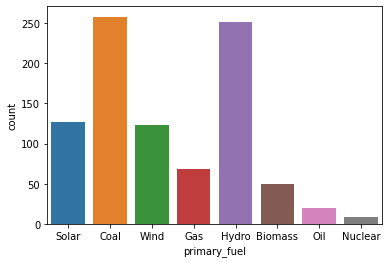

In [14]:
sns.countplot(data['primary_fuel'])

In [15]:
data['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

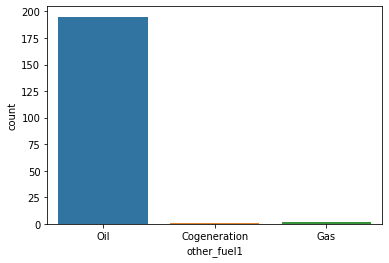

In [16]:
sns.countplot(data['other_fuel1'])

Other_fuel1 is majorly oil. Therefore, we will relpace the remaining NUll values in this column with oil.

<AxesSubplot:xlabel='commissioning_year', ylabel='count'>

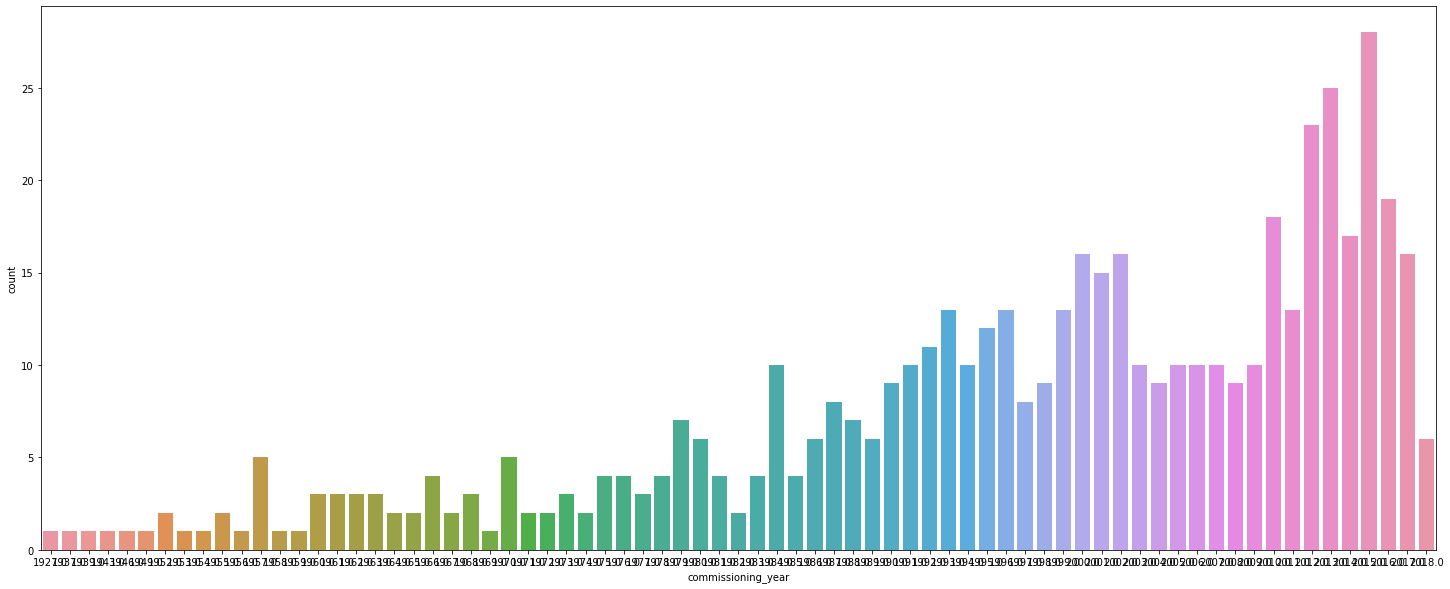

In [17]:
plt.figure(figsize = (25, 10))
sns.countplot(data['commissioning_year'])

In [18]:
print('Commisioning_Year, Mean:' , data['commissioning_year'].mean())
print('Commisioning_Year, Mode:' , data['commissioning_year'].mode())

Commisioning_Year, Mean: 1997.0910815939278
Commisioning_Year, Mode: 0    2015.0
Name: commissioning_year, dtype: float64


- Although, Commisioning year is a float data type but it is categorical in nature. Therefore, we will replace the Null values using mode() function.
- Owner column represents the name of owner's of power plant. We can not replace null values. Therefore, we will remove the owner column. As it does not contribute in Target Variable.

<AxesSubplot:>

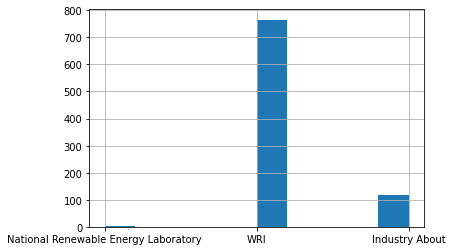

In [19]:
data['geolocation_source'].hist()

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

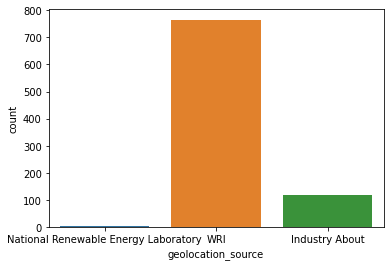

In [20]:
sns.countplot(data['geolocation_source'])

In [21]:
data['year_of_capacity_data'].unique()

array([  nan, 2019.])

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='count'>

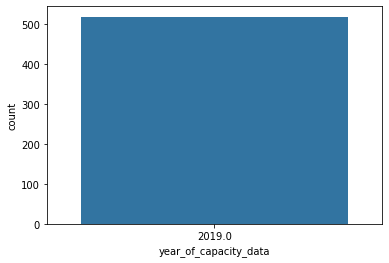

In [22]:
sns.countplot(data['year_of_capacity_data'])

Since, all the values in this column are 2019. therefore we will remove the column.

In [23]:
data['generation_gwh_2014'].mean()

2431.823590196343

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

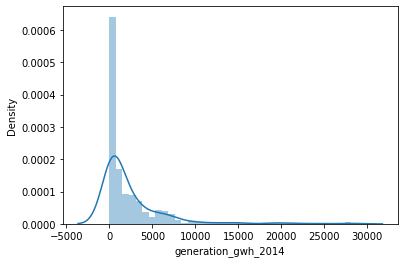

In [24]:
sns.distplot(data['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

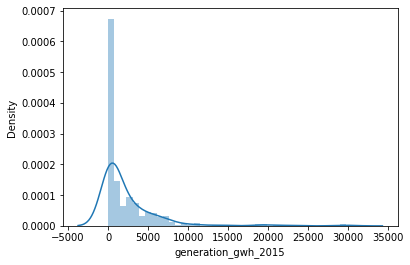

In [25]:
sns.distplot(data['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

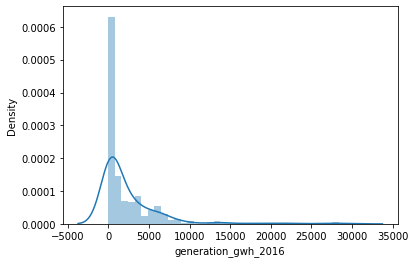

In [26]:
sns.distplot(data['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

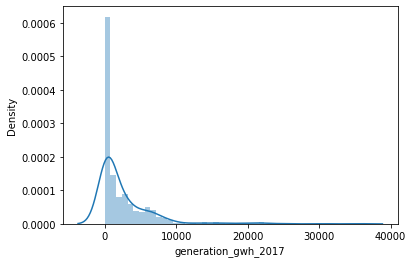

In [27]:
sns.distplot(data['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

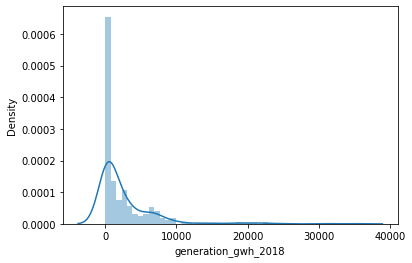

In [28]:
sns.distplot(data['generation_gwh_2018'])

In [29]:
print('Mean of Generation Growth: 2014 is',data['generation_gwh_2014'].mean())
print('Mean of Generation Growth: 2015 is',data['generation_gwh_2015'].mean())
print('Mean of Generation Growth: 2016 is',data['generation_gwh_2016'].mean())
print('Mean of Generation Growth: 2017 is',data['generation_gwh_2017'].mean())
print('Mean of Generation Growth: 2018 is',data['generation_gwh_2018'].mean())

Mean of Generation Growth: 2014 is 2431.823590196343
Mean of Generation Growth: 2015 is 2428.2269459614085
Mean of Generation Growth: 2016 is 2467.9368586349096
Mean of Generation Growth: 2017 is 2547.7593045102053
Mean of Generation Growth: 2018 is 2600.804098662014


Generation growth from year 2014 to 2018 have high null values, therefore we will replace these values using mean function.

In [30]:
data['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [31]:
data['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

Generation Data source is Central Electricity Authority, Which is common for every data point. Therefore, we will remove the column.

##### Columns to Remove: 
1. Generation Data Source
2. owner
3. year_of_capacity_data

In [32]:
data = data.drop(['owner','year_of_capacity_data','generation_data_source'], axis=1)

data.shape

(907, 14)

In [33]:
data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [34]:
data['generation_gwh_2014'] = data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015'] = data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016'] = data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017'] = data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_gwh_2018'] = data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean())

In [35]:
data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['commissioning_year'] = data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])

In [36]:
data['other_fuel1'].replace(np.nan, 'Oil', inplace = True)

<AxesSubplot:xlabel='latitude', ylabel='Density'>

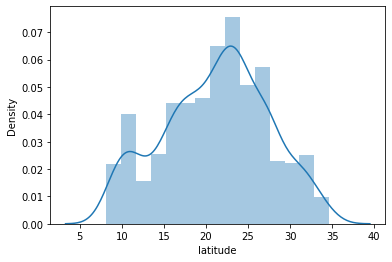

In [37]:
sns.distplot(data['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

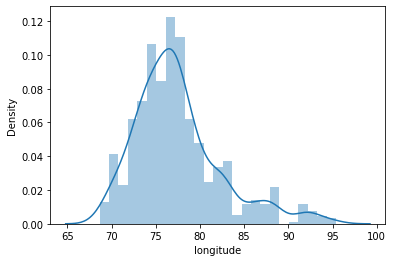

In [38]:
sns.distplot(data['longitude'])

In [39]:
print('latitude, Mean:' , data['latitude'].mean())
print('latitude, Mode:' , data['latitude'].mode())

latitude, Mean: 21.1979181184669
latitude, Mode: 0    19.0004
1    24.1917
Name: latitude, dtype: float64


In [40]:
print('longitude, Mean:' , data['longitude'].mean())
print('longitude, Mode:' , data['longitude'].mode())

longitude, Mean: 77.46490720092916
longitude, Mode: 0    71.6917
Name: longitude, dtype: float64


In [41]:
data['latitude'] = data['latitude'].fillna(data['latitude'].mean())
data['longitude'] = data['longitude'].fillna(data['longitude'].mean())

In [42]:
data.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

All the Null values are removed. We can proceed ahead.

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.388900,76.979200,79.206100,95.408
commissioning_year,907.0,2004.594267,15.734928,1927.0000,1998.000000,2014.000000,2015.000000,2018.000
generation_gwh_2014,907.0,2431.823590,2665.338608,0.0000,1211.362750,2431.823590,2431.823590,28127.000
generation_gwh_2015,907.0,2428.226946,2859.349132,0.0000,916.000000,2428.226946,2428.226946,30539.000
generation_gwh_2016,907.0,2467.936859,2877.890004,0.0000,896.500214,2467.936859,2467.936859,30015.000
generation_gwh_2017,907.0,2547.759305,2921.502193,0.0000,882.594850,2547.759305,2547.759305,35116.000
generation_gwh_2018,907.0,2600.804099,3030.808041,0.0000,824.842340,2600.804099,2600.804099,35136.000


### BiVariate Analysis

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

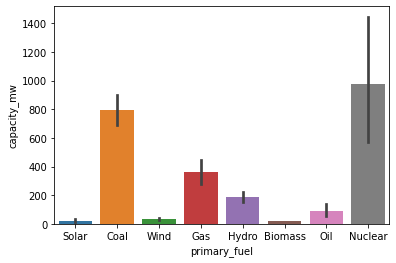

In [44]:
sns.barplot(x='primary_fuel', y='capacity_mw', data = data)

Coal and Nuclear power plant has highest capacity.

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

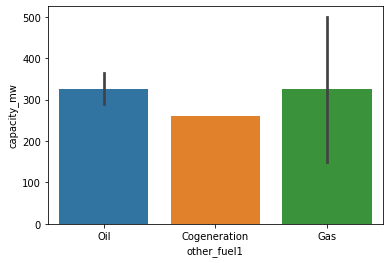

In [45]:
sns.barplot(x='other_fuel1', y='capacity_mw', data = data)

Even though, the majority of plants has oil as their secondary fuel but still the gas and cogeneration has equivalent capacity to the oil.

In [46]:
data['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [47]:
data['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

As we can see, both source and url columns having highest data points from Central Electricity Authority. But these are having high cardinality. Therefore, we will drop both these columns.

In [48]:
data = data.drop(['source', 'url'], axis=1)

data.shape

(907, 12)

In [49]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [50]:
data['geolocation_source'].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

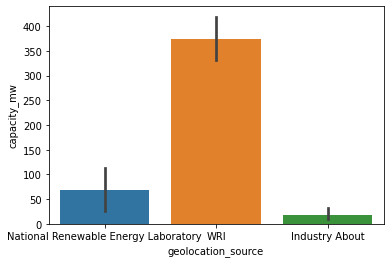

In [51]:
sns.barplot(x='geolocation_source', y='capacity_mw', data = data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

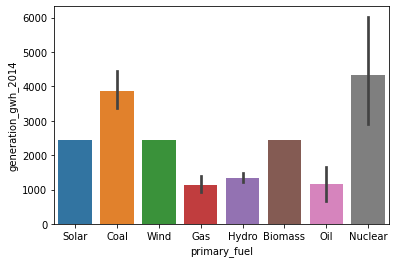

In [52]:
sns.barplot(x='primary_fuel', y='generation_gwh_2014', data = data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

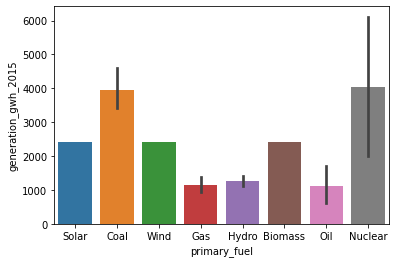

In [53]:
sns.barplot(x='primary_fuel', y='generation_gwh_2015', data = data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

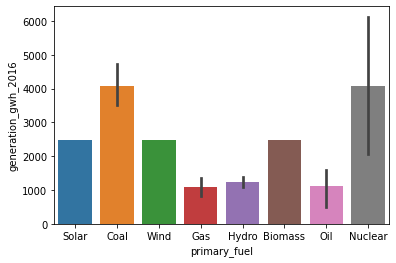

In [54]:
sns.barplot(x='primary_fuel', y='generation_gwh_2016', data = data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

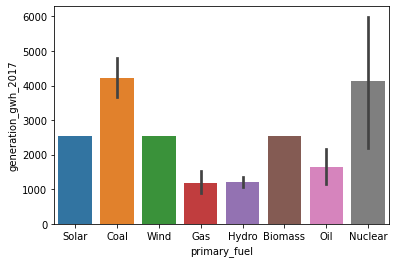

In [55]:
sns.barplot(x='primary_fuel', y='generation_gwh_2017', data = data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

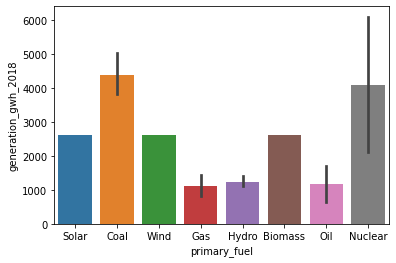

In [56]:
sns.barplot(x='primary_fuel', y='generation_gwh_2018', data = data)

#### Multi-Variate Analysis

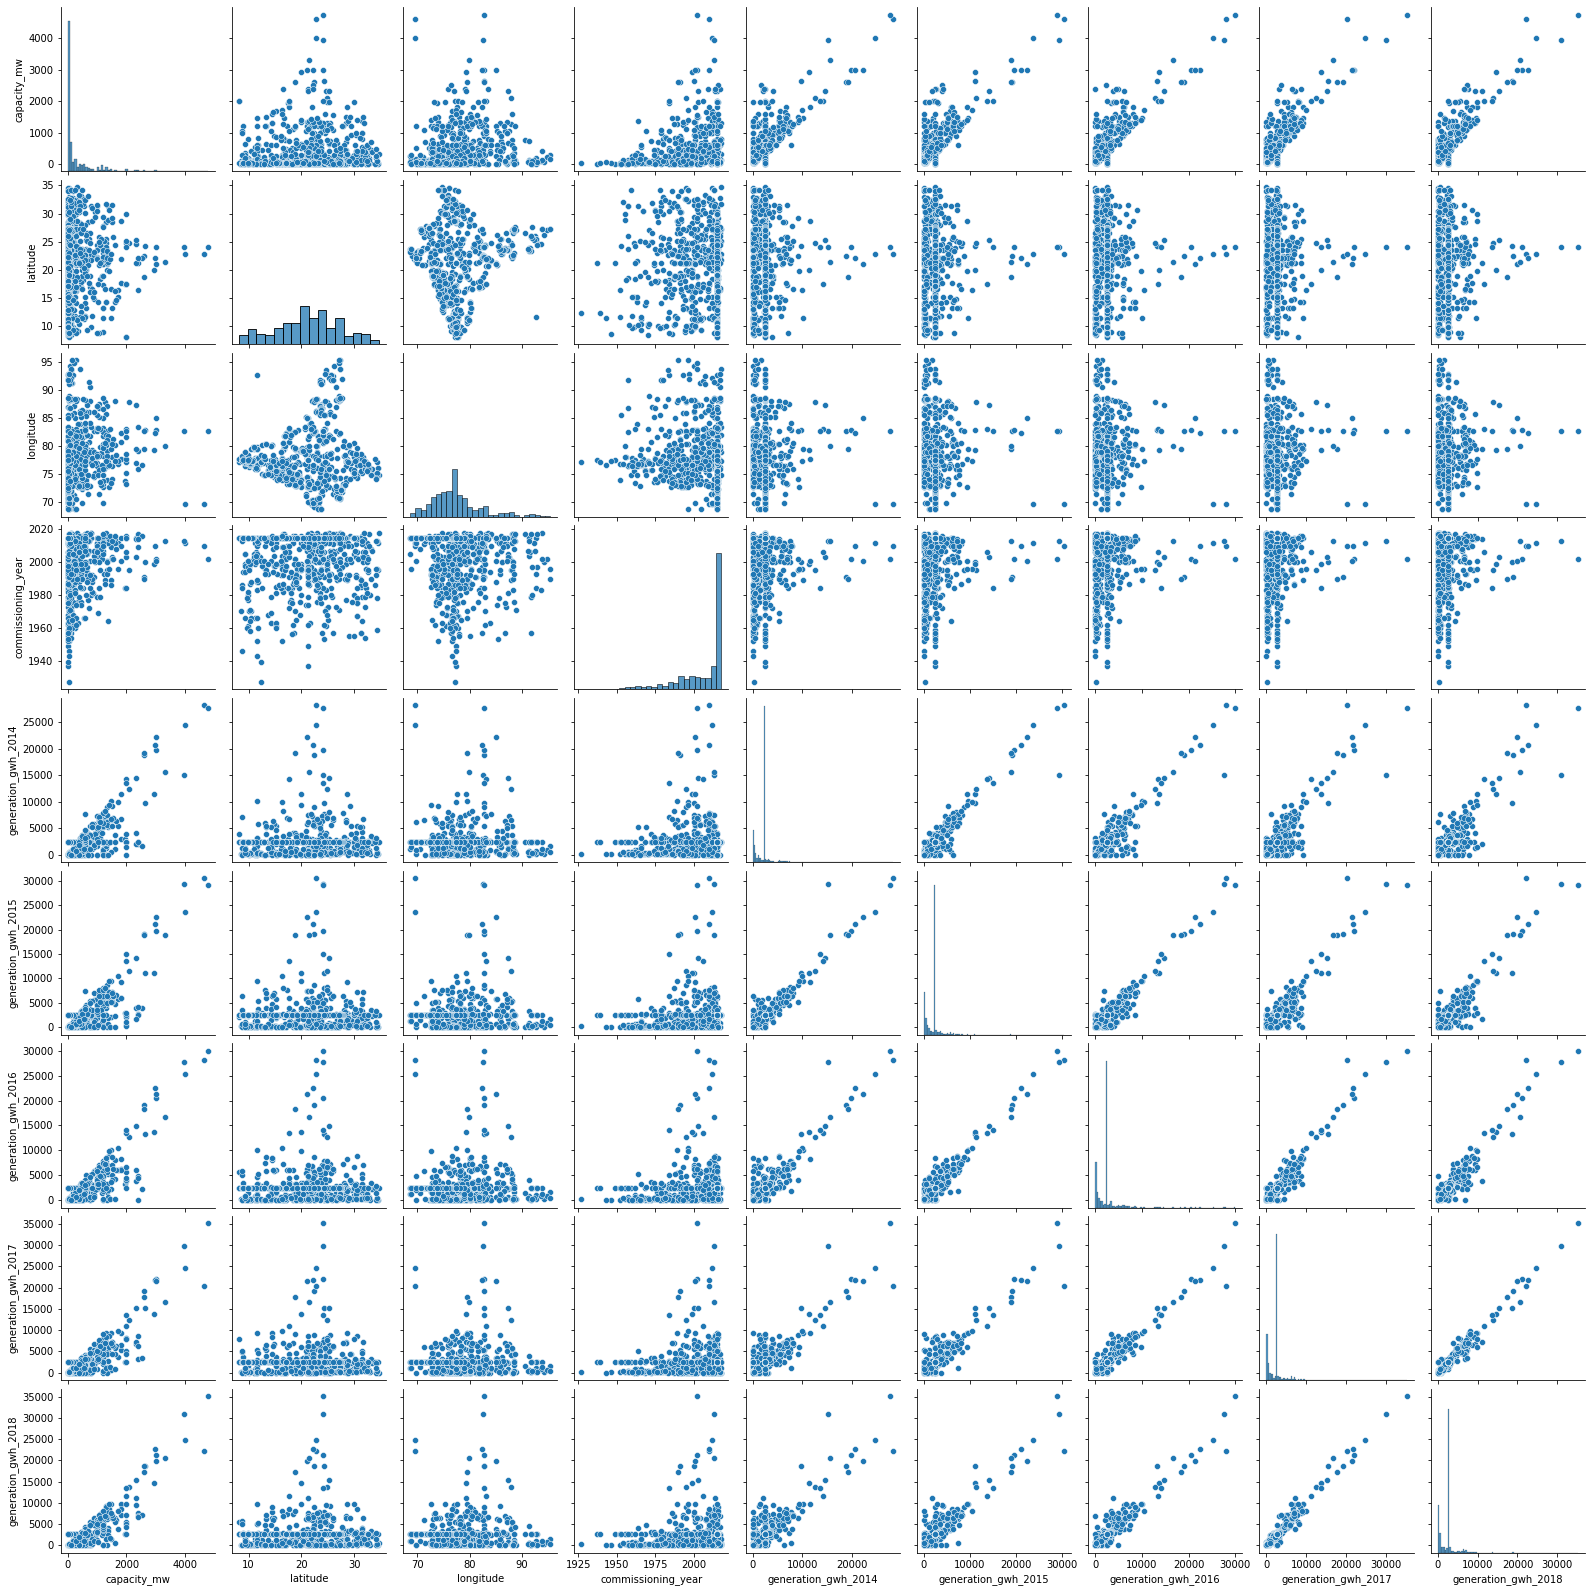

In [57]:
# Pair Plot

sns.pairplot(data)
plt.show()

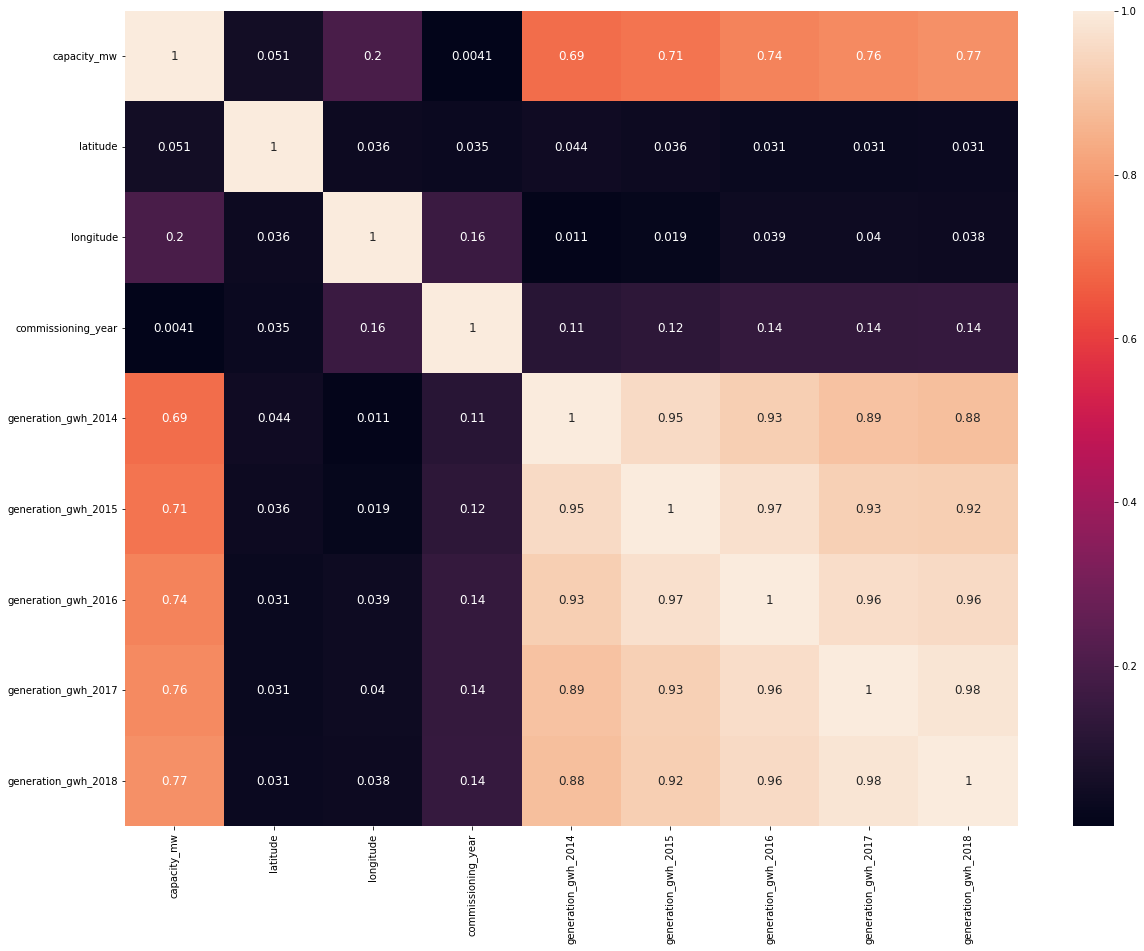

In [58]:
data_corr = data.corr().abs()

plt.figure(figsize = (20,15))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

From the correlation matrix, we can see that Generation growth in years 2014 to 2018 are having strong relation with each other. Therefore, we will remove these columns and will replace them by a single column named total generation growth.

In [59]:
data['total_generation']=data['generation_gwh_2014']+data['generation_gwh_2015']+data['generation_gwh_2016']+data['generation_gwh_2017']+data['generation_gwh_2018']

In [60]:
data = data.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'], axis=1)

data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,total_generation
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,12476.550798
1,98.0,24.7663,74.6090,Coal,Oil,2015.0,WRI,12476.550798
2,39.2,21.9038,69.3732,Wind,Oil,2015.0,WRI,12476.550798
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,3637.554320
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,27859.499736


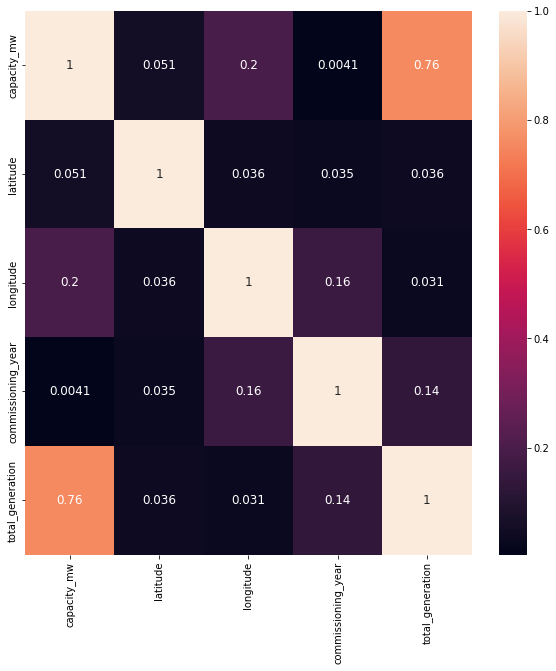

In [61]:
data_corr = data.corr().abs()

plt.figure(figsize = (10,10))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

There seems to be no correlation among the features.

#### Encoding Categorical Data

In [62]:
# Encoding Dataset

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

elements = data.select_dtypes(include=['object']).columns

elements

Index(['primary_fuel', 'other_fuel1', 'geolocation_source'], dtype='object')

In [63]:
for i in elements:
    data[i] = enc.fit_transform(data[i])

In [64]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,total_generation
0,2.5,28.1839,73.2407,6,2,2011.0,1,12476.550798
1,98.0,24.7663,74.6090,1,2,2015.0,2,12476.550798
2,39.2,21.9038,69.3732,7,2,2015.0,2,12476.550798
3,135.0,23.8712,91.3602,2,2,2004.0,2,3637.554320
4,1800.0,21.9603,82.4091,1,2,2015.0,2,27859.499736


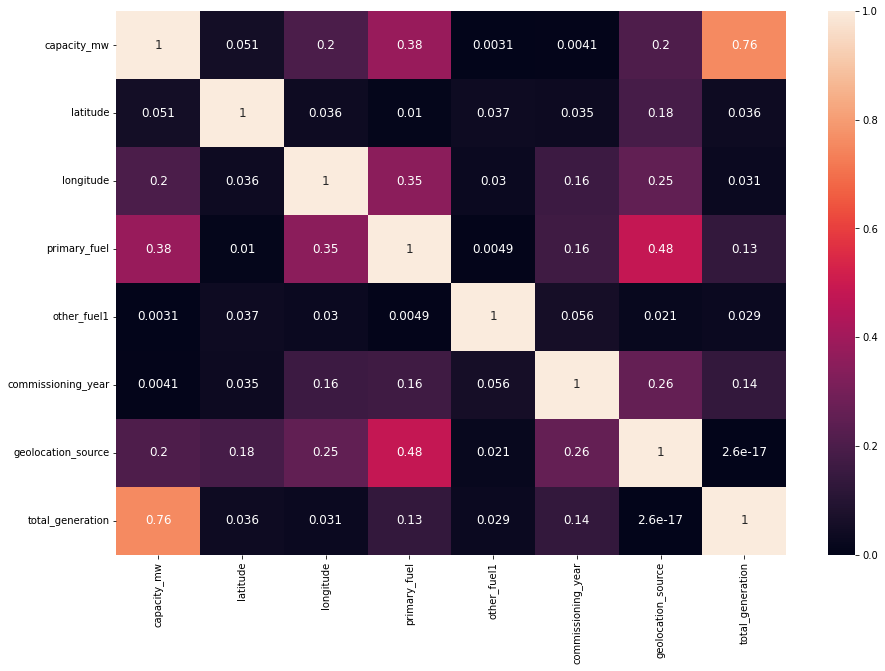

In [65]:
data_corr = data.corr().abs()

plt.figure(figsize = (15,10))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

#### Checking Skewness and Outliers

In [66]:
x = data.drop(['capacity_mw'], axis=1)
y = data['capacity_mw']

In [67]:
print(x.shape)
print(y.shape)

(907, 7)
(907,)


In [68]:
x.skew().sort_values(ascending = False)

total_generation       5.219383
longitude              1.141881
primary_fuel           0.472251
latitude              -0.149698
commissioning_year    -1.714873
geolocation_source    -2.159841
other_fuel1          -20.453120
dtype: float64

There is skewness present in the dataset. Therefore, we will use power transformation to remove skewness.

In [69]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [70]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

total_generation       0.149755
longitude              0.002926
primary_fuel          -0.047067
latitude              -0.074269
commissioning_year    -1.077695
geolocation_source    -2.132728
other_fuel1          -17.330022
dtype: float64

The high negative value in column other_fuel1 can be ignored,as it a categorical data with most values as oil.

In [71]:
x = pd.DataFrame(x_new, columns = x.columns)

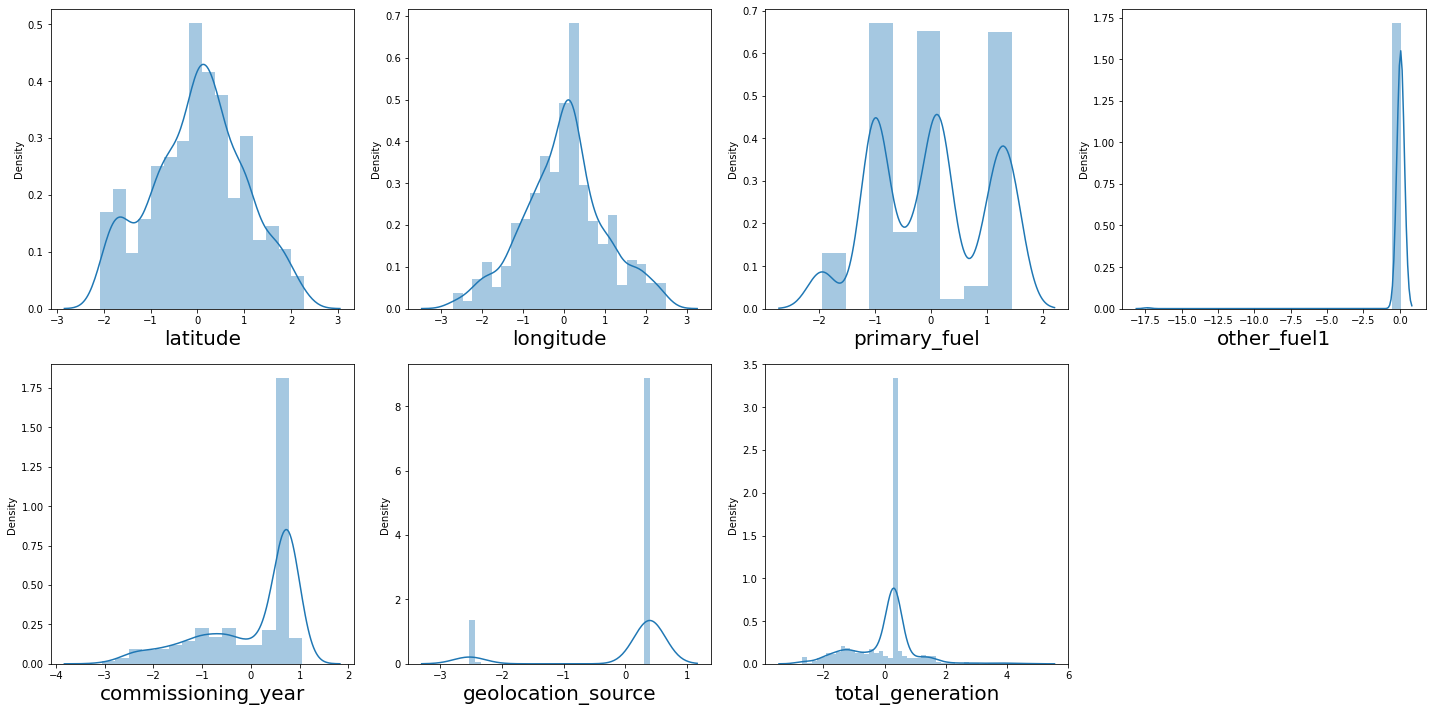

In [72]:
plt.figure(figsize = (20,10))
plotnumber = 1

for column in x:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Checking Outliers

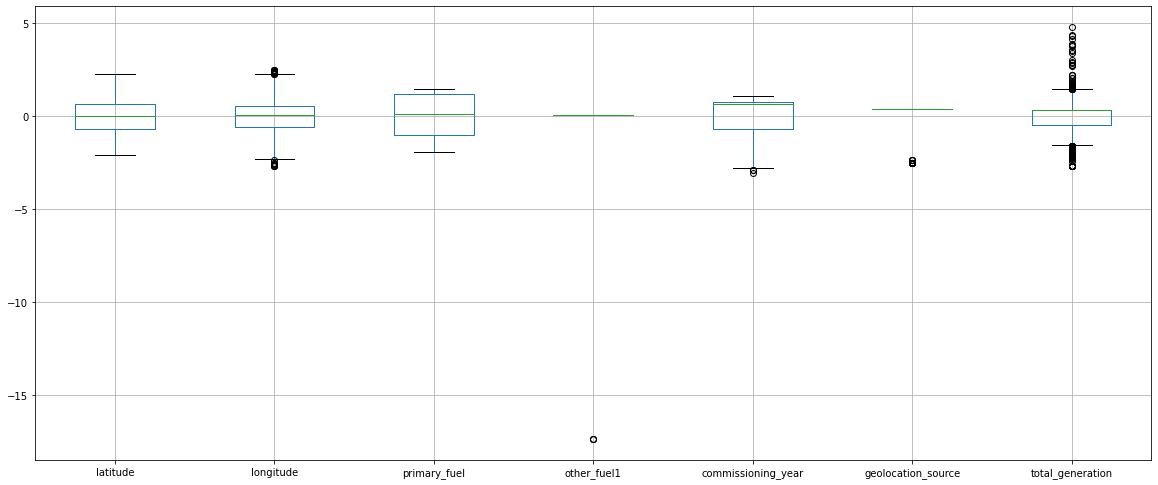

In [73]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [74]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
latitude               True
longitude              True
primary_fuel           True
other_fuel1            True
commissioning_year     True
geolocation_source     True
total_generation      False
dtype: bool
****************************************
Low Side Outliers Present
latitude               True
longitude              True
primary_fuel           True
other_fuel1           False
commissioning_year    False
geolocation_source     True
total_generation       True
dtype: bool


We can drop the column, other_fuel1 because of the reasons:
1. Having Skewness
2. Having Outliers
3. had NaN values, replace by mode function which is oil.

In [75]:
x = x.drop(['other_fuel1'], axis=1)

x.head()

,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,total_generation
0,1.159436,-0.952545,1.171313,0.358184,-2.345400,0.298476
1,0.579032,-0.544976,-0.996291,0.743571,0.396062,0.298476
2,0.099912,-2.379864,1.441576,0.743571,0.396062,0.298476
3,0.428491,2.174468,-0.362170,-0.237119,0.396062,-0.794938
4,0.109302,1.117231,-0.996291,0.743571,0.396062,1.316066


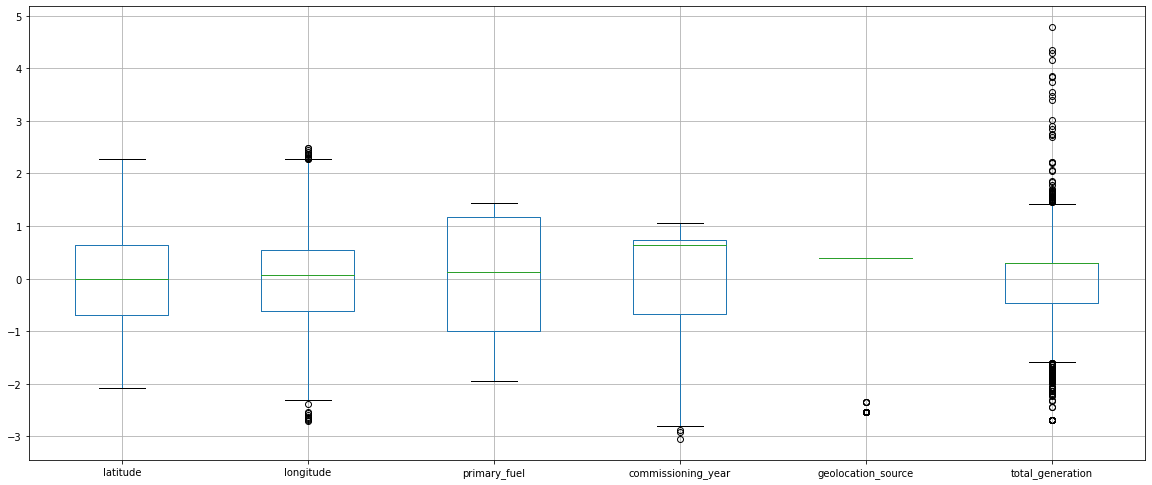

In [76]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [77]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
latitude               True
longitude              True
primary_fuel           True
commissioning_year     True
geolocation_source     True
total_generation      False
dtype: bool
****************************************
Low Side Outliers Present
latitude               True
longitude              True
primary_fuel           True
commissioning_year    False
geolocation_source     True
total_generation       True
dtype: bool


Features having outliers in High Side are: 1. total_generation

Features having outliers in Low side are: 1. commissioning_year

In [78]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [79]:
total_generation_high = q3.total_generation + (1.5 * iqr.total_generation)

# Check the Indexes which have higher values

index1 = np.where(x['total_generation']> total_generation_high)

x = x.drop(x['total_generation'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(860, 6)
(860,)


In [80]:
commissioning_year_low = q1.commissioning_year - (1.5 * iqr.commissioning_year)

# Check the Indexes which have higher values

index1 = np.where(x['commissioning_year']< commissioning_year_low)

x = x.drop(x['commissioning_year'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(857, 6)
(857,)


In [81]:
# Percentage Loss of Data

Data_loss = ((907-857)/907)*100

Data_loss

5.512679162072767

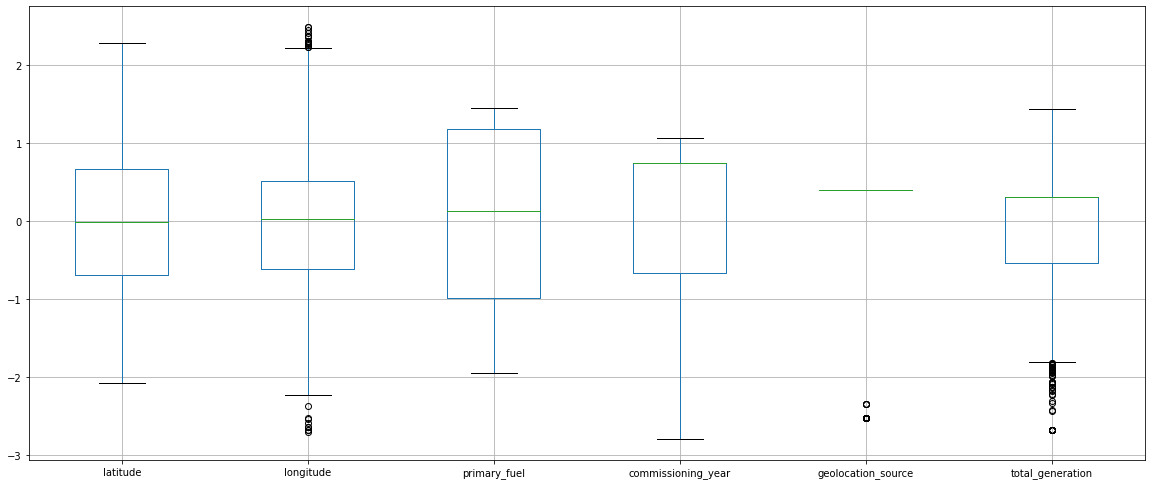

In [82]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

It is evident from the graph that all values lies between +3 to -3, which means outliers are removed.

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.046818,latitude
1,1.200132,longitude
2,1.365701,primary_fuel
3,1.322340,commissioning_year
4,1.479634,geolocation_source
5,1.261076,total_generation


As VIF value is around 1 for our Dataset. We are certain that there is no multicollinearity present in the data.

# Model Building

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [86]:
max_r2_score = 0
maxRS = 0
model = [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor(), xgb.XGBRegressor()]
for r_state in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = r_state)
    for i in model:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        r2score = r2_score(y_test,y_pred)
        print('r2_score', r2score*100,'%', 'random_state', r_state, 'Model', i)
        if r2score > max_r2_score:
            max_r2_score = r2score
            maxRS = r_state
            final_model = i

            
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

r2_score 21.835485342827564 % random_state 1 Model LinearRegression()
r2_score 63.20914924380816 % random_state 1 Model DecisionTreeRegressor()
r2_score 47.68313699660255 % random_state 1 Model KNeighborsRegressor()
r2_score 74.2201265570959 % random_state 1 Model RandomForestRegressor()
r2_score 69.46964143567159 % random_state 1 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
    

r2_score 72.79972894265089 % random_state 9 Model RandomForestRegressor()
r2_score 64.02514221550233 % random_state 9 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 17.854032213661576 % random_state 10 Model LinearRegression()
r2_score 49.828320429641856 % random_state 10 Model DecisionTreeRegressor()
r2_score 52.92411018453051 % random_stat

r2_score 72.03207868373451 % random_state 17 Model RandomForestRegressor()
r2_score 65.4019549604242 % random_state 17 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 21.435865768632155 % random_state 18 Model LinearRegression()
r2_score 49.87597844653894 % random_state 18 Model DecisionTreeRegressor()
r2_score 53.52863256069354 % random_stat

r2_score 65.99242640567311 % random_state 25 Model RandomForestRegressor()
r2_score 64.20625104641672 % random_state 25 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 17.022882545602545 % random_state 26 Model LinearRegression()
r2_score 40.521754214697935 % random_state 26 Model DecisionTreeRegressor()
r2_score 45.38227001435446 % random_st

r2_score 71.02938974876038 % random_state 33 Model RandomForestRegressor()
r2_score 64.87541460762259 % random_state 33 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 13.479649919389058 % random_state 34 Model LinearRegression()
r2_score 45.566126898159666 % random_state 34 Model DecisionTreeRegressor()
r2_score 42.83630743835665 % random_st

r2_score 69.99942780956785 % random_state 41 Model RandomForestRegressor()
r2_score 64.3030078531855 % random_state 41 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 18.07905353458832 % random_state 42 Model LinearRegression()
r2_score 44.159356337169406 % random_state 42 Model DecisionTreeRegressor()
r2_score 29.998120392861892 % random_sta

r2_score 58.37597081950021 % random_state 49 Model RandomForestRegressor()
r2_score 57.67806796451828 % random_state 49 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.459749414011217 % random_state 50 Model LinearRegression()
r2_score 26.95705481506494 % random_state 50 Model DecisionTreeRegressor()
r2_score 46.57523829596648 % random_sta

r2_score 61.03434392614291 % random_state 57 Model RandomForestRegressor()
r2_score 58.64641474394448 % random_state 57 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 18.680340459665423 % random_state 58 Model LinearRegression()
r2_score 57.04239138627055 % random_state 58 Model DecisionTreeRegressor()
r2_score 52.638326262161414 % random_st

r2_score 64.01566846305938 % random_state 65 Model RandomForestRegressor()
r2_score 57.96858696683576 % random_state 65 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 13.604253463295935 % random_state 66 Model LinearRegression()
r2_score 48.859362008967025 % random_state 66 Model DecisionTreeRegressor()
r2_score 65.41930638994721 % random_st

r2_score 73.67572785336817 % random_state 73 Model RandomForestRegressor()
r2_score 67.25306589195404 % random_state 73 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 18.658785043413705 % random_state 74 Model LinearRegression()
r2_score 59.482792040293994 % random_state 74 Model DecisionTreeRegressor()
r2_score 53.3284229053698 % random_sta

r2_score 57.32434136282809 % random_state 81 Model RandomForestRegressor()
r2_score 61.204775899704636 % random_state 81 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 14.900079631602836 % random_state 82 Model LinearRegression()
r2_score 51.98109706793426 % random_state 82 Model DecisionTreeRegressor()
r2_score 35.541761953198105 % random_s

r2_score 66.66916754809942 % random_state 89 Model RandomForestRegressor()
r2_score 58.82496173748309 % random_state 89 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 24.495874230027493 % random_state 90 Model LinearRegression()
r2_score 32.338948193482445 % random_state 90 Model DecisionTreeRegressor()
r2_score 54.40391306437272 % random_st

r2_score 51.077507634244476 % random_state 97 Model RandomForestRegressor()
r2_score 49.98396937949302 % random_state 97 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 18.72711221644564 % random_state 98 Model LinearRegression()
r2_score 52.84797000580765 % random_state 98 Model DecisionTreeRegressor()
r2_score 43.08030741375508 % random_sta

r2_score 75.63093856859138 % random_state 105 Model RandomForestRegressor()
r2_score 79.07243631478251 % random_state 105 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 24.25727657949527 % random_state 106 Model LinearRegression()
r2_score 52.35778866102936 % random_state 106 Model DecisionTreeRegressor()
r2_score 50.40113664816227 % random_

r2_score 67.8555718293694 % random_state 113 Model RandomForestRegressor()
r2_score 66.568161068648 % random_state 113 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 17.871941634652632 % random_state 114 Model LinearRegression()
r2_score 39.818021730861076 % random_state 114 Model DecisionTreeRegressor()
r2_score 42.58653215330095 % random_s

r2_score 72.73655185330642 % random_state 121 Model RandomForestRegressor()
r2_score 62.205201324938116 % random_state 121 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 22.518702673196987 % random_state 122 Model LinearRegression()
r2_score 35.71319290171214 % random_state 122 Model DecisionTreeRegressor()
r2_score 51.24122330556538 % rando

r2_score 70.59118463178875 % random_state 129 Model RandomForestRegressor()
r2_score 62.71278853481237 % random_state 129 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 11.079525972921855 % random_state 130 Model LinearRegression()
r2_score 42.47916333881507 % random_state 130 Model DecisionTreeRegressor()
r2_score 43.95945175722289 % random

r2_score 70.1820523561834 % random_state 137 Model RandomForestRegressor()
r2_score 64.2556918111467 % random_state 137 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score -1.1954643175714263 % random_state 138 Model LinearRegression()
r2_score 31.448514109343307 % random_state 138 Model DecisionTreeRegressor()
r2_score 46.912605310371845 % rando

r2_score 62.31786244492703 % random_state 145 Model RandomForestRegressor()
r2_score 63.726573363192784 % random_state 145 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 20.734670653538156 % random_state 146 Model LinearRegression()
r2_score 60.575167873339375 % random_state 146 Model DecisionTreeRegressor()
r2_score 48.18734871912246 % rand

r2_score 72.23879421134617 % random_state 153 Model RandomForestRegressor()
r2_score 72.55357960885972 % random_state 153 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 23.64327647462079 % random_state 154 Model LinearRegression()
r2_score 10.290867534962878 % random_state 154 Model DecisionTreeRegressor()
r2_score 54.5531769039975 % random_

r2_score 69.35367455832287 % random_state 161 Model RandomForestRegressor()
r2_score 61.6708413919761 % random_state 161 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 17.189241751126104 % random_state 162 Model LinearRegression()
r2_score 51.674668206217646 % random_state 162 Model DecisionTreeRegressor()
r2_score 37.863281068482976 % rando

r2_score 69.21601728313651 % random_state 169 Model RandomForestRegressor()
r2_score 68.10444472573035 % random_state 169 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 21.61589222379924 % random_state 170 Model LinearRegression()
r2_score 55.57225091147975 % random_state 170 Model DecisionTreeRegressor()
r2_score 46.29869847494893 % random_

r2_score 65.83858572570249 % random_state 177 Model RandomForestRegressor()
r2_score 64.96799669294084 % random_state 177 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 20.426337903860258 % random_state 178 Model LinearRegression()
r2_score 46.74266902059044 % random_state 178 Model DecisionTreeRegressor()
r2_score 37.57615906357269 % random

r2_score 70.64682121756152 % random_state 185 Model RandomForestRegressor()
r2_score 64.15695589356696 % random_state 185 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 21.620733743906584 % random_state 186 Model LinearRegression()
r2_score 51.044989224517735 % random_state 186 Model DecisionTreeRegressor()
r2_score 54.770976099626125 % rand

r2_score 59.921797424375754 % random_state 193 Model RandomForestRegressor()
r2_score 44.17007544604833 % random_state 193 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 19.89671094745784 % random_state 194 Model LinearRegression()
r2_score 50.28952812525122 % random_state 194 Model DecisionTreeRegressor()
r2_score 41.06732069095994 % random

In [87]:
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

max R2 score corresponds to random state:  8 is 0.8073875409551159 and Model is:  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


XGBRegressor is the best model with highest R2 Score, therefore we will perform Parameter tuning using GridSearchCV on XGBRegressor.

In [88]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 8)

import xgboost as xgb
xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                       early_stopping_rounds=None, enable_categorical=False,
                       eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                       importance_type=None, interaction_constraints='',
                       learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
                       max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
                       monotone_constraints='()', n_estimators=100, n_jobs=0,
                       num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
                       reg_lambda=1)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

r2score = r2_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(xgb, x_scaled, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

R2 Score:  0.8073875409551159
Mean Squared Error:  28173.674651377605
At CV: 2
Cross Validation Score is:  58.93697893886257
R2_Score is :  0.8073875409551159
At CV: 3
Cross Validation Score is:  68.82672142863944
R2_Score is :  0.8073875409551159
At CV: 4
Cross Validation Score is:  67.20002807891386
R2_Score is :  0.8073875409551159
At CV: 5
Cross Validation Score is:  67.9287933776503
R2_Score is :  0.8073875409551159
At CV: 6
Cross Validation Score is:  69.0880067451506
R2_Score is :  0.8073875409551159
At CV: 7
Cross Validation Score is:  66.04359164991295
R2_Score is :  0.8073875409551159
At CV: 8
Cross Validation Score is:  66.8286135810599
R2_Score is :  0.8073875409551159
At CV: 9
Cross Validation Score is:  64.32266823459759
R2_Score is :  0.8073875409551159


In [89]:
cvscore_selected = cross_val_score(xgb, x_scaled, y, cv = 6).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.690880067451506 
The R2_Score is:  0.8073875409551159


#### Parameter Tuning using GridSearchCV

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : np.arange(10,100,10), 
              'max_depth': np.arange(1,21,5)}

grd = GridSearchCV(xgb, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

grd = grd.best_estimator_

grd.fit(x_train, y_train)
y_pred = grd.predict(x_test)


print('R2 Score: ', grd.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best Param ==> {'max_depth': 1, 'n_estimators': 70}
R2 Score:  0.732450608153428
Mean Squared Error:  39134.79717998269


Text(0, 0.5, 'Predicted_y')

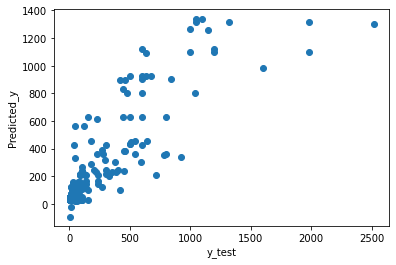

In [91]:
# Actual Vs Predicted Graph
plt.scatter(x=y_test, y=y_pred)
plt.xlabel('y_test')
plt.ylabel('Predicted_y')

In [92]:
# Saving the Regression Model

import joblib
joblib.dump(xgb, "Global_Power_Plant_Database_Reg.pkl")

['Global_Power_Plant_Database_Reg.pkl']

### Prediction with Primary_fuel

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [94]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'geolocation_source', 'total_generation'],
      dtype='object')

In [95]:
x_c = data.drop(['primary_fuel'], axis=1)
y_c = data['primary_fuel']

In [96]:
print(x_c.shape)
print(y_c.shape)

(907, 7)
(907,)


In [97]:
x_c.skew().sort_values(ascending = False)

total_generation       5.219383
capacity_mw            3.123576
longitude              1.141881
latitude              -0.149698
commissioning_year    -1.714873
geolocation_source    -2.159841
other_fuel1          -20.453120
dtype: float64

In [98]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x_c)

In [99]:
pd.DataFrame(x_new, columns = x_c.columns).skew().sort_values(ascending = False)

total_generation       0.149755
capacity_mw            0.022164
longitude              0.002926
latitude              -0.074269
commissioning_year    -1.077695
geolocation_source    -2.132728
other_fuel1          -17.330022
dtype: float64

In [100]:
x_c = pd.DataFrame(x_new, columns = x_c.columns)

other_fuel1 column has high skewness because number of zero values. therefore, we can use the transformed data even though the value is high.

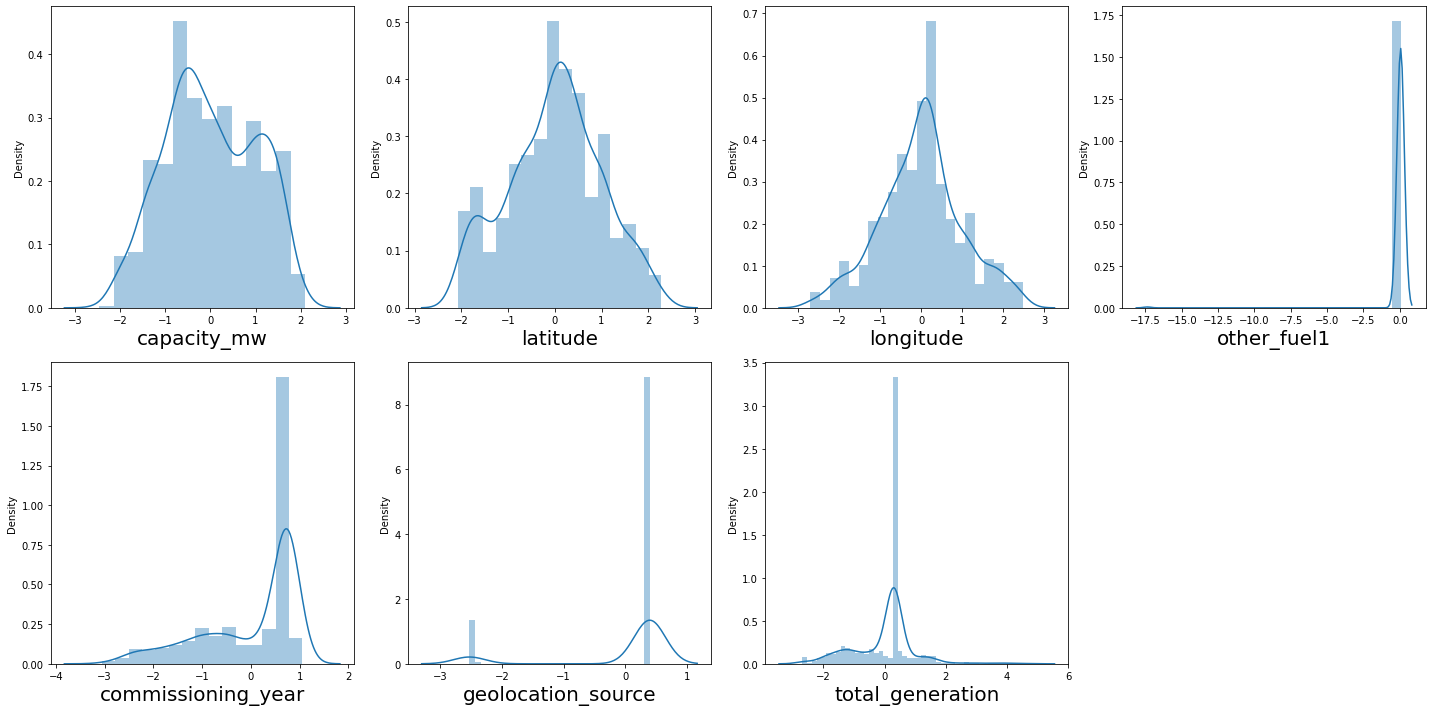

In [101]:
plt.figure(figsize = (20,10))
plotnumber = 1

for column in x_c:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(x_c[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Checking Outliers

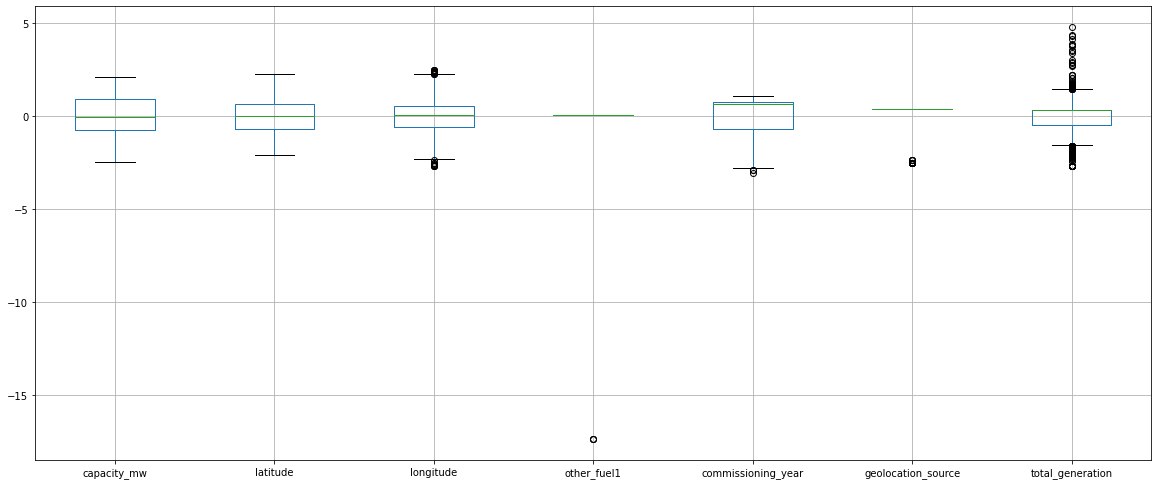

In [102]:
x_c.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [103]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x_c)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x_c)>-3).all())

High Side Outliers present
capacity_mw            True
latitude               True
longitude              True
other_fuel1            True
commissioning_year     True
geolocation_source     True
total_generation      False
dtype: bool
****************************************
Low Side Outliers Present
capacity_mw            True
latitude               True
longitude              True
other_fuel1           False
commissioning_year    False
geolocation_source     True
total_generation       True
dtype: bool


Features having outliers in High Side are: 1. total_generation

Features having outliers in Low side are: 1. commissioning_year

In [104]:
# Validating OUtliers

#1st Quantile
q1 = x_c.quantile(0.25)

#3rd quantile
q3 = x_c.quantile(0.75)

#IQR
iqr = q3 - q1

In [105]:
total_generation_high = q3.total_generation + (1.5 * iqr.total_generation)

# Check the Indexes which have higher values

index2 = np.where(x_c['total_generation']> total_generation_high)

x_c = x_c.drop(x_c['total_generation'].index[index2])

y_c = y_c.drop(y_c.index[index2])

print(x_c.shape)
print(y_c.shape)

(860, 7)
(860,)


In [106]:
commissioning_year_low = q1.commissioning_year - (1.5 * iqr.commissioning_year)

# Check the Indexes which have higher values

index2 = np.where(x_c['commissioning_year']< commissioning_year_low)

x_c = x_c.drop(x_c['commissioning_year'].index[index2])

y_c = y_c.drop(y_c.index[index2])

print(x_c.shape)
print(y_c.shape)

(857, 7)
(857,)


In [107]:
# Percentage Loss of Data

Data_loss = ((907-857)/907)*100

Data_loss

5.512679162072767

In [108]:
x_c = x_c.drop(['other_fuel1'],axis=1)

x_c.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,total_generation
0,-1.695767,1.159436,-0.952545,0.358184,-2.345400,0.298476
1,0.193694,0.579032,-0.544976,0.743571,0.396062,0.298476
2,-0.292337,0.099912,-2.379864,0.743571,0.396062,0.298476
3,0.360998,0.428491,2.174468,-0.237119,0.396062,-0.794938
4,1.649503,0.109302,1.117231,0.743571,0.396062,1.316066


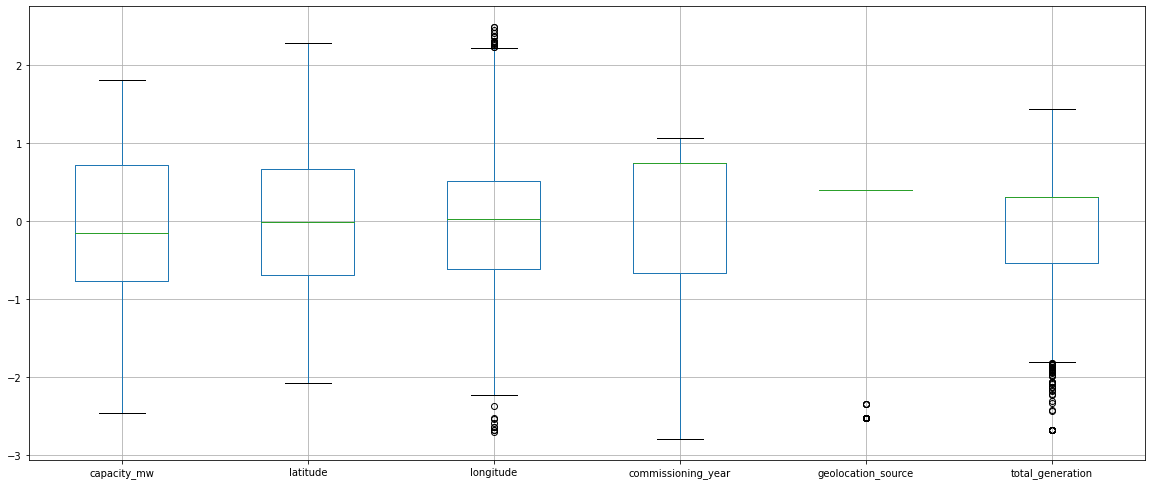

In [109]:
x_c.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled_c = scaler.fit_transform(x_c)

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled_c, i) for i in range (x_scaled_c.shape[1])]

vif['features'] = x_c.columns


# Lets check the values 
vif

,vif,features
0,1.382425,capacity_mw
1,1.072137,latitude
2,1.169210,longitude
3,1.320170,commissioning_year
4,1.486991,geolocation_source
5,1.253143,total_generation


As VIF value is around 1 for our Dataset. We are certain that there is no multicollinearity present in the data.

In [112]:
maxAccu = 0
maxRS = 0

model = [LogisticRegression(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         KNeighborsClassifier(),
         xgb.XGBClassifier(),
         SVC()]

for rs in range(1,200):
    xc_train, xc_test, yc_train, yc_test = train_test_split(x_scaled_c, y_c, test_size = 0.25, random_state = rs)
    for ic in model:
        ic.fit(xc_train, yc_train)
        yc_pred = ic.predict(xc_test)
        acc = accuracy_score(yc_test,yc_pred)
        print('Accuracy score', acc, 'random_state', rs, 'Model', ic)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = rs
            final_model = ic
            
        
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', ic)

Accuracy score 0.7302325581395349 random_state 1 Model LogisticRegression()
Accuracy score 0.8511627906976744 random_state 1 Model RandomForestClassifier()
Accuracy score 0.7488372093023256 random_state 1 Model DecisionTreeClassifier()
Accuracy score 0.8093023255813954 random_state 1 Model KNeighborsClassifier()
Accuracy score 0.8418604651162791 random_state 1 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='m

Accuracy score 0.8372093023255814 random_state 8 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7627906976744186 random_state 8 Model SVC()
Accuracy score 0.6372093023255814 random_state 9 Model LogisticRegression()
Accuracy score 0.8 random_state 9 Model RandomForestClassifier()
Accuracy score 0.7767441860465

Accuracy score 0.8186046511627907 random_state 16 Model RandomForestClassifier()
Accuracy score 0.7953488372093023 random_state 16 Model DecisionTreeClassifier()
Accuracy score 0.7953488372093023 random_state 16 Model KNeighborsClassifier()
Accuracy score 0.8465116279069768 random_state 16 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alph

Accuracy score 0.8186046511627907 random_state 23 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7488372093023256 random_state 23 Model SVC()
Accuracy score 0.6837209302325581 random_state 24 Model LogisticRegression()
Accuracy score 0.8325581395348837 random_state 24 Model RandomForestClassifier()
Accuracy sc

Accuracy score 0.8418604651162791 random_state 31 Model RandomForestClassifier()
Accuracy score 0.772093023255814 random_state 31 Model DecisionTreeClassifier()
Accuracy score 0.7674418604651163 random_state 31 Model KNeighborsClassifier()
Accuracy score 0.8418604651162791 random_state 31 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha

Accuracy score 0.8093023255813954 random_state 38 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.6930232558139535 random_state 38 Model SVC()
Accuracy score 0.6651162790697674 random_state 39 Model LogisticRegression()
Accuracy score 0.827906976744186 random_state 39 Model RandomForestClassifier()
Accuracy sco

Accuracy score 0.8046511627906977 random_state 46 Model RandomForestClassifier()
Accuracy score 0.7255813953488373 random_state 46 Model DecisionTreeClassifier()
Accuracy score 0.7767441860465116 random_state 46 Model KNeighborsClassifier()
Accuracy score 0.8046511627906977 random_state 46 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alph

Accuracy score 0.8046511627906977 random_state 53 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7255813953488373 random_state 53 Model SVC()
Accuracy score 0.6976744186046512 random_state 54 Model LogisticRegression()
Accuracy score 0.8744186046511628 random_state 54 Model RandomForestClassifier()
Accuracy sc

Accuracy score 0.8558139534883721 random_state 61 Model RandomForestClassifier()
Accuracy score 0.8046511627906977 random_state 61 Model DecisionTreeClassifier()
Accuracy score 0.813953488372093 random_state 61 Model KNeighborsClassifier()
Accuracy score 0.8511627906976744 random_state 61 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha

Accuracy score 0.813953488372093 random_state 68 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7441860465116279 random_state 68 Model SVC()
Accuracy score 0.6697674418604651 random_state 69 Model LogisticRegression()
Accuracy score 0.8186046511627907 random_state 69 Model RandomForestClassifier()
Accuracy sco

Accuracy score 0.8 random_state 76 Model RandomForestClassifier()
Accuracy score 0.7534883720930232 random_state 76 Model DecisionTreeClassifier()
Accuracy score 0.772093023255814 random_state 76 Model KNeighborsClassifier()
Accuracy score 0.813953488372093 random_state 76 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accurac

Accuracy score 0.8186046511627907 random_state 83 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7441860465116279 random_state 83 Model SVC()
Accuracy score 0.6744186046511628 random_state 84 Model LogisticRegression()
Accuracy score 0.8 random_state 84 Model RandomForestClassifier()
Accuracy score 0.795348837

Accuracy score 0.7906976744186046 random_state 91 Model RandomForestClassifier()
Accuracy score 0.7302325581395349 random_state 91 Model DecisionTreeClassifier()
Accuracy score 0.7488372093023256 random_state 91 Model KNeighborsClassifier()
Accuracy score 0.786046511627907 random_state 91 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha

Accuracy score 0.786046511627907 random_state 98 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7255813953488373 random_state 98 Model SVC()
Accuracy score 0.6697674418604651 random_state 99 Model LogisticRegression()
Accuracy score 0.813953488372093 random_state 99 Model RandomForestClassifier()
Accuracy scor

Accuracy score 0.8372093023255814 random_state 106 Model RandomForestClassifier()
Accuracy score 0.7674418604651163 random_state 106 Model DecisionTreeClassifier()
Accuracy score 0.7953488372093023 random_state 106 Model KNeighborsClassifier()
Accuracy score 0.8093023255813954 random_state 106 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_

Accuracy score 0.8186046511627907 random_state 113 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7488372093023256 random_state 113 Model SVC()
Accuracy score 0.7162790697674418 random_state 114 Model LogisticRegression()
Accuracy score 0.8465116279069768 random_state 114 Model RandomForestClassifier()
Accurac

Accuracy score 0.7953488372093023 random_state 121 Model RandomForestClassifier()
Accuracy score 0.7348837209302326 random_state 121 Model DecisionTreeClassifier()
Accuracy score 0.786046511627907 random_state 121 Model KNeighborsClassifier()
Accuracy score 0.8186046511627907 random_state 121 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_a

Accuracy score 0.813953488372093 random_state 128 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7069767441860465 random_state 128 Model SVC()
Accuracy score 0.6558139534883721 random_state 129 Model LogisticRegression()
Accuracy score 0.7441860465116279 random_state 129 Model RandomForestClassifier()
Accuracy

Accuracy score 0.813953488372093 random_state 136 Model RandomForestClassifier()
Accuracy score 0.7813953488372093 random_state 136 Model DecisionTreeClassifier()
Accuracy score 0.7953488372093023 random_state 136 Model KNeighborsClassifier()
Accuracy score 0.8232558139534883 random_state 136 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_a

Accuracy score 0.8232558139534883 random_state 143 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7441860465116279 random_state 143 Model SVC()
Accuracy score 0.7162790697674418 random_state 144 Model LogisticRegression()
Accuracy score 0.7906976744186046 random_state 144 Model RandomForestClassifier()
Accurac

Accuracy score 0.7906976744186046 random_state 151 Model RandomForestClassifier()
Accuracy score 0.7767441860465116 random_state 151 Model DecisionTreeClassifier()
Accuracy score 0.7767441860465116 random_state 151 Model KNeighborsClassifier()
Accuracy score 0.7906976744186046 random_state 151 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_

Accuracy score 0.8604651162790697 random_state 158 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7255813953488373 random_state 158 Model SVC()
Accuracy score 0.7255813953488373 random_state 159 Model LogisticRegression()
Accuracy score 0.8325581395348837 random_state 159 Model RandomForestClassifier()
Accurac

Accuracy score 0.8325581395348837 random_state 166 Model RandomForestClassifier()
Accuracy score 0.7767441860465116 random_state 166 Model DecisionTreeClassifier()
Accuracy score 0.7767441860465116 random_state 166 Model KNeighborsClassifier()
Accuracy score 0.8511627906976744 random_state 166 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_

Accuracy score 0.8418604651162791 random_state 173 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7534883720930232 random_state 173 Model SVC()
Accuracy score 0.6883720930232559 random_state 174 Model LogisticRegression()
Accuracy score 0.7674418604651163 random_state 174 Model RandomForestClassifier()
Accurac

Accuracy score 0.8418604651162791 random_state 181 Model RandomForestClassifier()
Accuracy score 0.7674418604651163 random_state 181 Model DecisionTreeClassifier()
Accuracy score 0.786046511627907 random_state 181 Model KNeighborsClassifier()
Accuracy score 0.827906976744186 random_state 181 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_al

Accuracy score 0.827906976744186 random_state 188 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy score 0.7209302325581395 random_state 188 Model SVC()
Accuracy score 0.7116279069767442 random_state 189 Model LogisticRegression()
Accuracy score 0.8 random_state 189 Model RandomForestClassifier()
Accuracy score 0.739534

Accuracy score 0.786046511627907 random_state 196 Model RandomForestClassifier()
Accuracy score 0.7534883720930232 random_state 196 Model DecisionTreeClassifier()
Accuracy score 0.7953488372093023 random_state 196 Model KNeighborsClassifier()
Accuracy score 0.8046511627906977 random_state 196 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_a

In [113]:
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', ic)

Max Accuracy score is 0.8930232558139535 at random_state 199 for Model: SVC()


In [114]:
from sklearn.model_selection import cross_val_score

xc_train, xc_test, yc_train, yc_test = train_test_split(x_scaled_c, y_c, test_size = 0.25, random_state = 199)

svc = SVC()

svc.fit(xc_train, yc_train)

yc_pred = svc.predict(xc_test)

print('Accuracy Score: ', accuracy_score(yc_test, yc_pred))

for i in range (2,11):
    cvscore = cross_val_score(svc, x_scaled_c, y_c, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy_Score is : ", accuracy_score(yc_test, yc_pred))

Accuracy Score:  0.7209302325581395
At CV: 2
Cross Validation Score is:  72.5785896346644
Accuracy_Score is :  0.7209302325581395
At CV: 3
Cross Validation Score is:  73.39549339549339
Accuracy_Score is :  0.7209302325581395
At CV: 4
Cross Validation Score is:  73.86274722886328
Accuracy_Score is :  0.7209302325581395
At CV: 5
Cross Validation Score is:  74.56276349789202
Accuracy_Score is :  0.7209302325581395
At CV: 6
Cross Validation Score is:  74.33106799303982
Accuracy_Score is :  0.7209302325581395
At CV: 7
Cross Validation Score is:  74.09512385521982
Accuracy_Score is :  0.7209302325581395
At CV: 8
Cross Validation Score is:  74.21577535479405
Accuracy_Score is :  0.7209302325581395
At CV: 9
Cross Validation Score is:  74.56627680311891
Accuracy_Score is :  0.7209302325581395
At CV: 10
Cross Validation Score is:  74.67441860465117
Accuracy_Score is :  0.7209302325581395


In [115]:
cvscore_selected = cross_val_score(svc, x_scaled_c, y_c, cv = 10).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy_Score is: ", accuracy_score(yc_test, yc_pred))

The CV Score is:  0.7467441860465116 
The Accuracy_Score is:  0.7209302325581395


#### Parameter Tuning using GridSearchCV

In [116]:
# HyperParameter Tuning

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grd = GridSearchCV(svc, param_grid = param_grid)
grd.fit(xc_train, yc_train)

print('Best Param ==>', grd.best_params_)

clf = grd.best_estimator_      # reinstiating with best parameters

clf.fit(xc_train, yc_train)
yc_pred = clf.predict(xc_test)

svc_conf_mat = confusion_matrix(yc_test, yc_pred)

print('\nconf_mat ==>', '\n', svc_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(yc_test, yc_pred))

Best Param ==> {'C': 1, 'gamma': 1, 'kernel': 'rbf'}

conf_mat ==> 
 [[ 8  1  0  0  0  0  0  1]
 [ 2 37  1  6  0  0  0  2]
 [ 0  2  7  7  0  0  0  0]
 [ 0  5  1 53  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  0  3  5  0  0  0  0]
 [ 0  0  0  1  0  0 40  0]
 [ 3  3  2  0  0  0  0 22]]

Accuracy rf Normal ==> 
 0.7767441860465116


In [117]:
# auc roc plot
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.74      0.77      0.76        48
           2       0.47      0.44      0.45        16
           3       0.74      0.90      0.81        59
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8
           6       1.00      0.98      0.99        41
           7       0.88      0.73      0.80        30

    accuracy                           0.78       215
   macro avg       0.55      0.58      0.56       215
weighted avg       0.74      0.78      0.76       215



Final Accuracy is: 88% and the Best Model is SVC.

In [118]:
fpr, tpr, thresholds = roc_curve(yc_test, yc_pred, pos_label = True)

print(fpr)
print('*******')
print(tpr)
print('*******')
print(thresholds)

[0.         0.13772455 0.37724551 0.77245509 0.85628743 0.93413174
 1.        ]
*******
[0.         0.04166667 0.04166667 0.16666667 0.1875     0.95833333
 1.        ]
*******
[8 7 6 3 2 1 0]


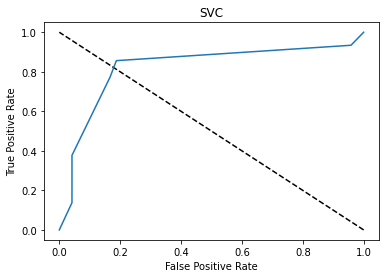

In [119]:
plt.plot([1,0],[0,1], 'k--')
plt.plot(tpr, fpr, label = "SVC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC')
plt.show()

In [120]:
# Saving the Classification Model

import joblib
joblib.dump(svc, "Global_Power_Plant_Database.pkl")

['Global_Power_Plant_Database.pkl']